#### Machine Learning Project Day_33
***
- Credit Loan System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head(7)

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
5,6.0,8265.0,4831.0,Salaried,53.0,Single,1.0,602.0,1.0,0.56,19522.0,2911.0,9798.0,36.0,Home,Semiurban,Graduate,Male,Unemployed,No
6,7.0,18850.0,2768.0,Salaried,58.0,Married,0.0,687.0,0.0,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [5]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [6]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


- Handling Missing Values

In [7]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [8]:
numerical_cols = df.select_dtypes(include=["number"]).columns
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [9]:
categorical_cols.size + numerical_cols.size

20

In [10]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [11]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [12]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [13]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [14]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

- Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'is Loan Approved or not')

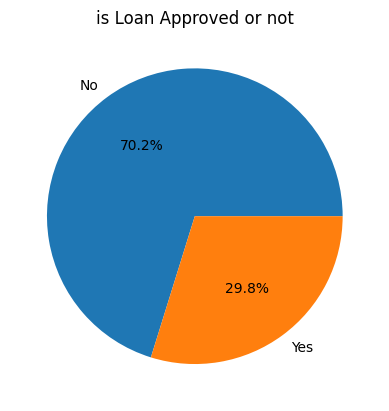

In [15]:
# how balanced  our classes are ?
classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("is Loan Approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

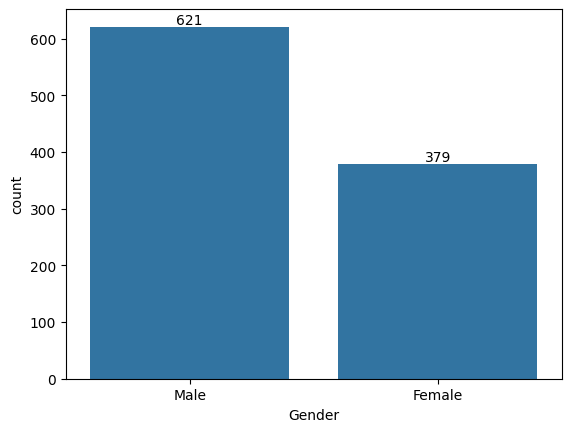

In [16]:
## analyze categories
gender_count = df["Gender"].value_counts()
ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])


[Text(0, 0, '722'), Text(0, 0, '278')]

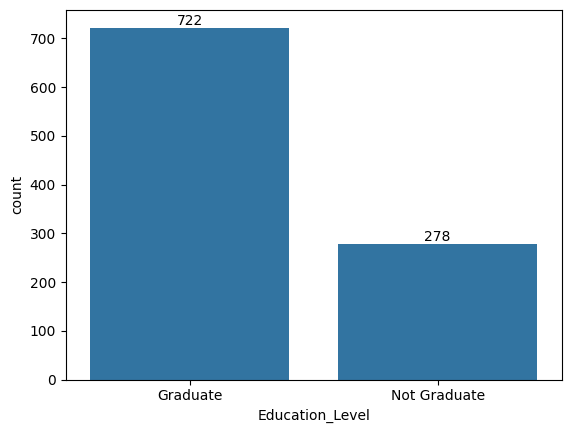

In [17]:
edu_count = df["Education_Level"].value_counts()
ax = sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

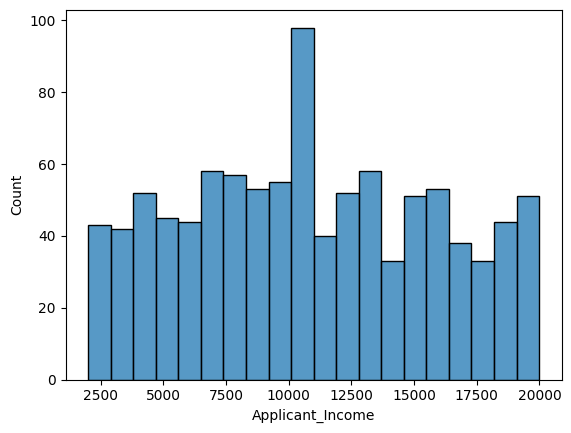

In [18]:
## analysis income
sns.histplot(
    data = df,x="Applicant_Income",bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

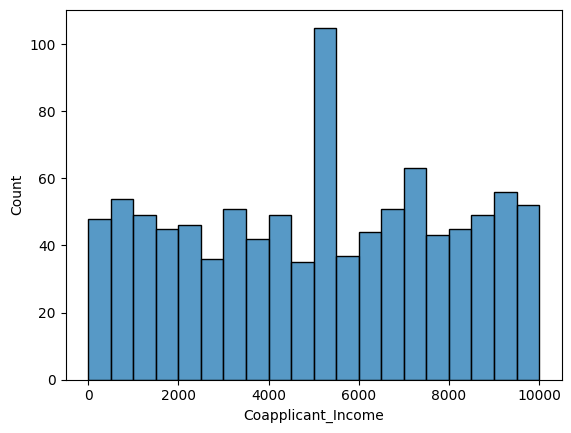

In [19]:
sns.histplot(
    data = df,x="Coapplicant_Income",bins=20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

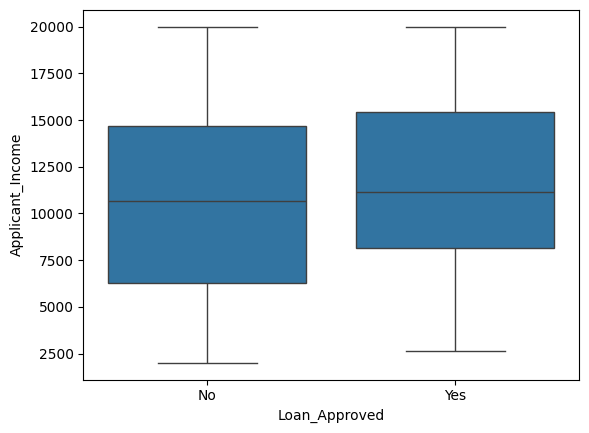

In [20]:
## outliers - box plot
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)

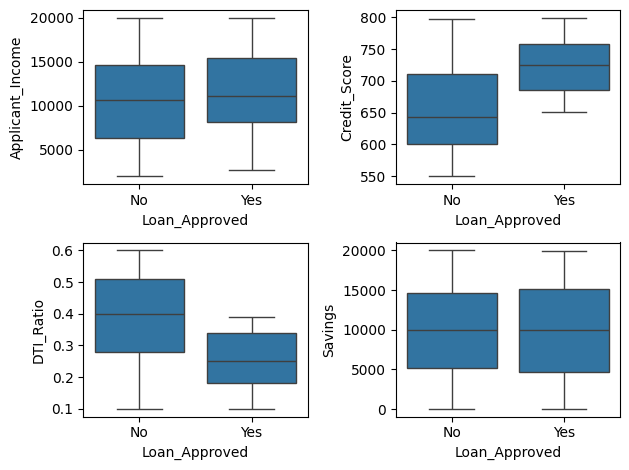

In [21]:
fig,axes = plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data=df,x="Loan_Approved",y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

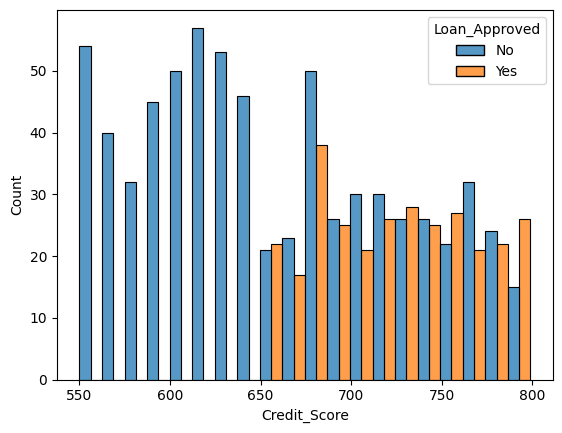

In [22]:
## Credit Score with Loan Approval
sns.histplot(
    data=df,x="Credit_Score",hue="Loan_Approved",bins=20,multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

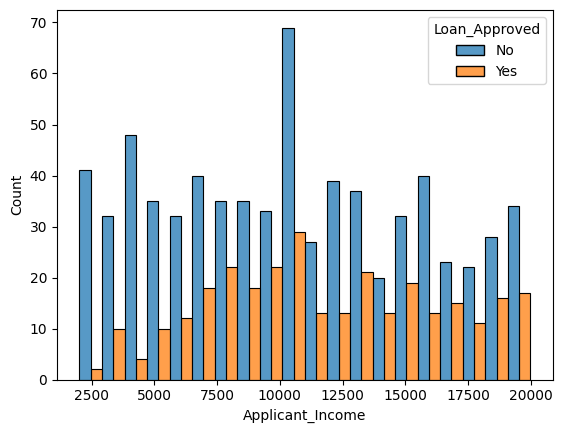

In [23]:
sns.histplot(
    data=df,x="Applicant_Income",hue="Loan_Approved",bins=20,multiple="dodge"
)

In [24]:
## Remove Applicant Id
df = df.drop("Applicant_ID",axis=1)

In [25]:
df.sample(10)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
54,14990.0,5415.0,Self-employed,36.000000,Single,1.000000,625.0,1.000000,0.37,5241.0,36723.0,25251.0,12.0,Education,Rural,Not Graduate,Female,Unemployed,No
677,3531.0,9042.0,Salaried,23.000000,Married,1.000000,686.0,2.000000,0.14,16861.0,43027.0,39915.0,48.0,Car,Urban,Graduate,Male,Unemployed,No
331,16262.0,1040.0,Salaried,30.000000,Married,0.000000,593.0,3.000000,0.53,19977.0,32849.0,13207.0,24.0,Education,Urban,Not Graduate,Male,Government,No
520,12975.0,3453.0,Salaried,36.000000,Single,1.000000,678.0,4.000000,0.31,11384.0,30868.0,9031.0,24.0,Home,Urban,Graduate,Female,MNC,Yes
779,12161.0,7000.0,Salaried,34.000000,Married,1.000000,709.0,3.000000,0.34,16978.0,34433.0,8965.0,36.0,Education,Semiurban,Graduate,Male,Unemployed,Yes
999,13093.0,2385.0,Salaried,23.000000,Married,1.000000,613.0,3.000000,0.32,12436.0,25816.0,35818.0,48.0,Personal,Semiurban,Graduate,Male,Private,No
467,19575.0,6917.0,Salaried,39.971579,Single,0.000000,591.0,2.000000,0.23,16814.0,15447.0,5597.0,60.0,Car,Urban,Graduate,Female,Government,No
893,6212.0,4437.0,Salaried,31.000000,Married,0.000000,665.0,1.950526,0.56,18044.0,1903.0,24211.0,60.0,Car,Urban,Graduate,Female,Private,No
792,2077.0,7622.0,Self-employed,45.000000,Married,1.474737,619.0,3.000000,0.57,18214.0,47605.0,39749.0,60.0,Home,Rural,Graduate,Male,Private,No
6,18850.0,2768.0,Salaried,58.000000,Married,0.000000,687.0,0.000000,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No


- Feature Encoding

In [26]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [27]:
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [29]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

In [30]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [31]:
cols = ["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]

ohe = OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

In [32]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(1000, 15))

In [33]:
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index=df.index)

In [34]:
encoded_df

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [35]:
df = pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

- Correlation Heatmap

In [37]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

In [38]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.006119,-0.000930,0.032498,0.040206,-0.050076,0.103456,0.013108,-0.025975,0.013923,-0.026566


In [39]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

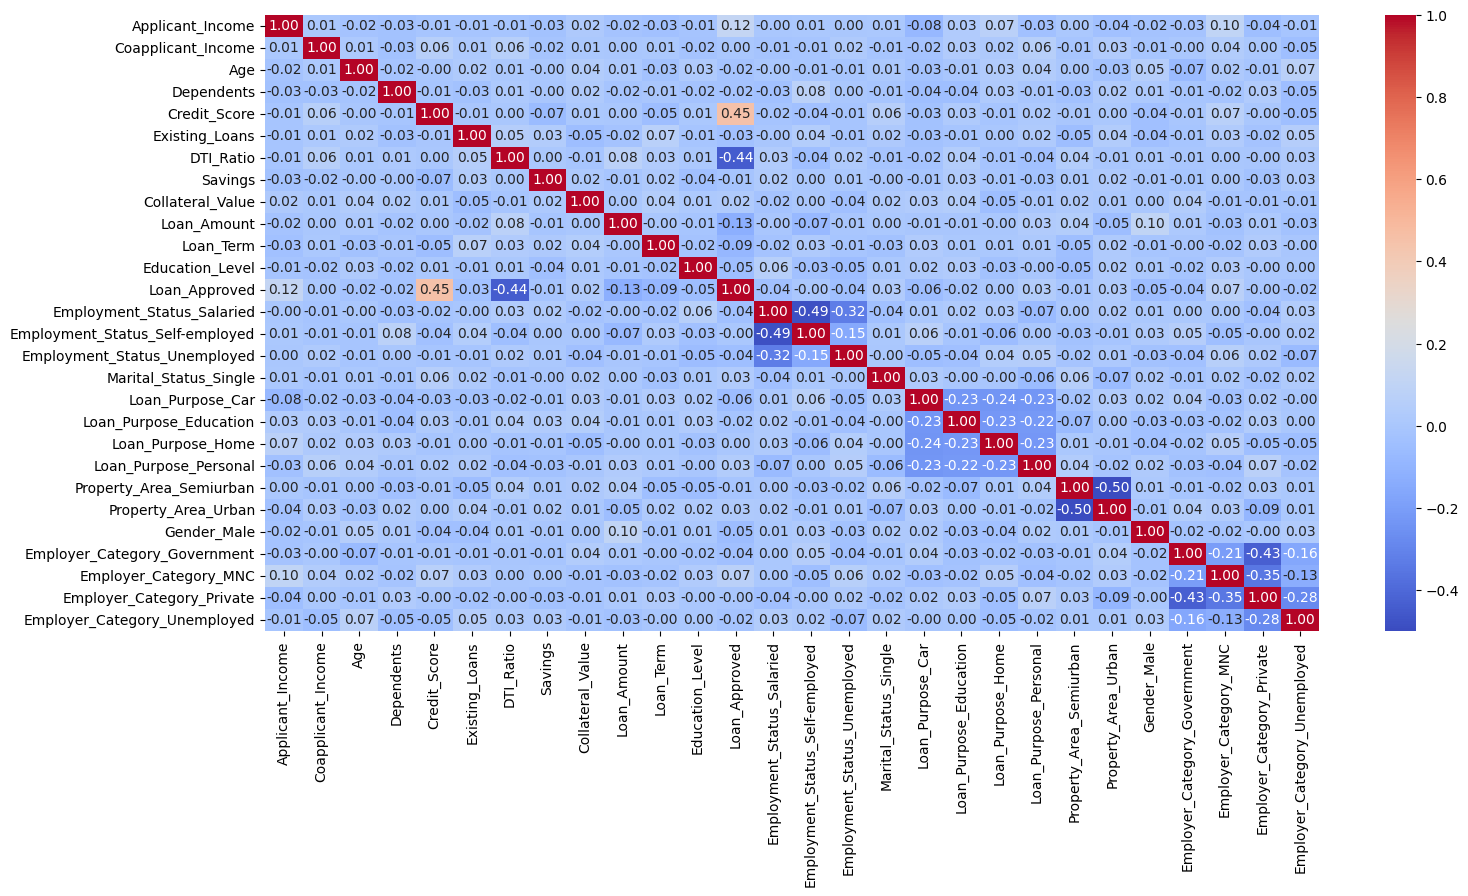

In [40]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

plt.figure(figsize=(17,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

- Train Test Split & Feature Scaling

In [41]:
x = df.drop("Loan_Approved",axis=1)
y = df["Loan_Approved"]

In [42]:
x.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [43]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
x_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
x_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]],
      shape=(800, 27))

In [49]:
x_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]], shape=(200, 27))

- Train & Evaluate Model

In [50]:
## Logisitc Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [51]:
y_pred = log_model.predict(x_test_scaled)
## Evaluation
print("Logisitc Regression")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Logisitc Regression
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 Score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [52]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)

# Model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train
knn_model.fit(x_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [53]:
# Predict
y_pred = knn_model.predict(x_test_scaled)

# Evaluation
print("KNN Model")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Model
Precision: 0.6274509803921569
Recall: 0.5245901639344263
F1 Score: 0.5714285714285714
Accuracy: 0.76
Confusion Matrix:
 [[120  19]
 [ 29  32]]


In [54]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)

# Model
nb_model = GaussianNB()
# Train
nb_model.fit(x_train_scaled, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [55]:
# Predict
y_pred = nb_model.predict(x_test_scaled)

# Evaluation
print("Naive bayes Model")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naive bayes Model
Precision: 0.8035714285714286
Recall: 0.7377049180327869
F1 Score: 0.7692307692307693
Accuracy: 0.865
Confusion Matrix:
 [[128  11]
 [ 16  45]]


- Best Model on basis of Precesion -> Naive Bayes

#### Feature Engineering

In [56]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2


df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])
x = df.drop(columns=["Loan_Approved","Credit_Score","DTI_Ratio"])
y = df["Loan_Approved"]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [59]:
## Logisitc Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)

y_pred = log_model.predict(x_test_scaled)
## Evaluation
print("Logisitc Regression")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("CM: ",confusion_matrix(y_test,y_pred))

Logisitc Regression
Precision:  0.7846153846153846
Recall:  0.8360655737704918
F1 Score:  0.8095238095238095
Accuracy:  0.88
CM:  [[125  14]
 [ 10  51]]


In [60]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)

# Model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train
knn_model.fit(x_train_scaled, y_train)

# Predict
y_pred = knn_model.predict(x_test_scaled)

# Evaluation
print("KNN Model")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Model
Precision: 0.6730769230769231
Recall: 0.5737704918032787
F1 Score: 0.6194690265486725
Accuracy: 0.785
Confusion Matrix:
 [[122  17]
 [ 26  35]]


In [61]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)

# Model
nb_model = GaussianNB()
# Train
nb_model.fit(x_train_scaled, y_train)

# Predict
y_pred = nb_model.predict(x_test_scaled)

# Evaluation
print("Naive bayes Model")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naive bayes Model
Precision: 0.8113207547169812
Recall: 0.7049180327868853
F1 Score: 0.7543859649122807
Accuracy: 0.86
Confusion Matrix:
 [[129  10]
 [ 18  43]]
